In [1]:
#Ignore warnings 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import numpy, pandas, matplotlib, seaborn libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
#read train data
train = pd.read_csv('train.csv')

In [4]:
#check top few rows
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#describe the training data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#check for missing and unique values in training data
df = pd.concat(objs=[train.isnull().sum().sort_values(ascending= False),
                     train.isnull().sum().sort_values(ascending= False)/train.shape[0]*100,train.nunique()],
               axis=1,keys=['Total_Missing','Percentage','Unique_Values'])
df

,Total_Missing,Percentage,Unique_Values
Cabin,687,77.104377,147
Age,177,19.865320,88
Embarked,2,0.224467,3
Fare,0,0.000000,248
Ticket,0,0.000000,681
Parch,0,0.000000,7
SibSp,0,0.000000,7
Sex,0,0.000000,2
Name,0,0.000000,891
Pclass,0,0.000000,3


In [8]:
#checking shape of the training data
train.shape

(891, 12)

In [9]:
#read test data
test = pd.read_csv('test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
#check for missing and unique values in training data
df1 = pd.concat(objs=[test.isnull().sum().sort_values(ascending= False),
                     test.isnull().sum().sort_values(ascending= False)/test.shape[0]*100,test.nunique()],
               axis=1,keys=['Total_Missing','Percentage','Unique_Values'])
df1

,Total_Missing,Percentage,Unique_Values
Cabin,327,78.229665,76
Age,86,20.574163,79
Fare,1,0.239234,169
Embarked,0,0.000000,3
Ticket,0,0.000000,363
Parch,0,0.000000,8
SibSp,0,0.000000,7
Sex,0,0.000000,2
Name,0,0.000000,418
Pclass,0,0.000000,3


In [11]:
test.shape

(418, 11)

## EDA and Feature Engineering

In [12]:
#Numeric Columns in Training dataset
numeric_cols = train.select_dtypes(include=np.number)
numeric_cols

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [13]:
#Correaltion of other numeric columns with Target column(Survived)
numeric_cols.drop(['Survived','PassengerId'],axis=1).corrwith(numeric_cols['Survived']).sort_values(ascending = False)

Fare      0.257307
Parch     0.081629
SibSp    -0.035322
Age      -0.077221
Pclass   -0.338481
dtype: float64

#### There are few negative correlation values with Survived feature

In [14]:
# String Type Columns
str_cols = train.select_dtypes(exclude=np.number)
str_cols

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [15]:
for col in str_cols:
    print(col, str_cols[col].nunique())

Name 891
Sex 2
Ticket 681
Cabin 147
Embarked 3


#### We need to delete uncategorical columns - Name, Ticket, Cabin

In [16]:
#plotly iplot -required libraries
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
init_notebook_mode(connected=True)
cf.go_offline()

In [17]:
#Pie chart for number of survived and deceased
survived_val = train['Survived'].value_counts()
survived_df = pd.DataFrame({'labels': survived_val.index,
                   'values': survived_val.values
                  })
survived_df.iplot(kind='pie',labels='labels',values='values', title='Survived and Deceased', hole = 0.6)

In [18]:
#Pie chart for Number of passengers for each class
pclass_val = train['Pclass'].value_counts()
pclass_df = pd.DataFrame({'labels': pclass_val.index,
                   'values': pclass_val.values
                  })
pclass_df.iplot(kind='pie',labels='labels',values='values', title='Passenger Class', hole = 0.6)

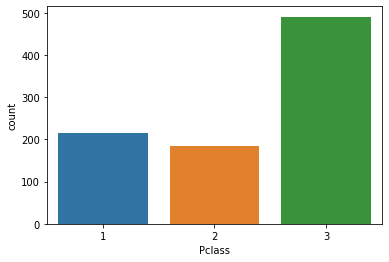

In [19]:
#Seaborn Count plot for Pclass
sb.countplot(train['Pclass'])

In [20]:
#Mean age of Male and Female Passengers
train[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [21]:
#Mean Fare by Sex for each Pclass
train[['Fare',"Sex", "Pclass"]].groupby(["Sex", "Pclass"]).mean()

Fare
Sex    Pclass            
female 1       106.125798
       2        21.970121
       3        16.118810
male   1        67.226127
       2        19.741782
       3        12.661633

In [22]:
import numpy as np
Q1 = np.quantile(train['Age'],0.25)
Q3 = np.quantile(train['Age'],0.75)
IQR = Q3 - Q1
IQR

nan

In [12]:
data = train.append(test).reset_index(drop = True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [24]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [37]:
pd.set_option('display.max_row',500)

In [48]:
data.loc[data['Pclass'] == 3,['Ticket']]

,Ticket
0,A/5 21171
2,STON/O2. 3101282
4,373450
5,330877
7,349909
...,...
1303,347086
1304,A.5. 3236
1306,SOTON/O.Q. 3101262
1307,359309


In [49]:
data[data['Ticket']=='LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [25]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [26]:
data.drop(['PassengerId','Name'],axis=1, inplace = True)

In [27]:
# Correlation between numerical values (SibSp Parch Age PClass and Fare values) and Survived 
data.drop(['Survived'],axis=1).corrwith(data['Survived']).iplot(kind ='bar')

In [28]:
df = pd.DataFrame(data[['Age', "Pclass"]].groupby(["Pclass"]).mean()).reset_index()
df

,Pclass,Age
0,1,39.159930
1,2,29.506705
2,3,24.816367


In [29]:
px.pie(df,values='Age',labels = 'Pclass',hover_name='Pclass')

In [30]:
data[['Age','SibSp','Parch','Fare']].iplot(kind = 'box')

In [31]:
data[data['Age']>66]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,0.0,1,male,71.0,0,0,PC 17754,34.6542,A5,C
116,0.0,3,male,70.5,0,0,370369,7.7500,NaN,Q
493,0.0,1,male,71.0,0,0,PC 17609,49.5042,NaN,C
630,1.0,1,male,80.0,0,0,27042,30.0000,A23,S
672,0.0,2,male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,0.0,1,male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,0.0,3,male,74.0,0,0,347060,7.7750,NaN,S
972,NaN,1,male,67.0,1,0,PC 17483,221.7792,C55 C57,S
987,NaN,1,female,76.0,1,0,19877,78.8500,C46,S


In [32]:
train[train['Age']>66]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [33]:
data['Famsize'] = data['Parch']+data['SibSp']
data.drop(['Parch','SibSp'],axis =1, inplace = True)
data

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Famsize
0,0.0,3,male,22.0,A/5 21171,7.2500,NaN,S,1
1,1.0,1,female,38.0,PC 17599,71.2833,C85,C,1
2,1.0,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1.0,1,female,35.0,113803,53.1000,C123,S,1
4,0.0,3,male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,NaN,A.5. 3236,8.0500,NaN,S,0
1305,NaN,1,female,39.0,PC 17758,108.9000,C105,C,0
1306,NaN,3,male,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,NaN,3,male,NaN,359309,8.0500,NaN,S,0


In [34]:
data[['Age','Famsize']].iplot(kind = 'box')

In [35]:
# a custom function for age imputation
def AgeImpute(df):
    Age = df[0]
    Pclass = df[1]
    
    if pd.isnull(Age):
        if Pclass == 1: return 39
        elif Pclass == 2: return 29
        else: return 24
    else:
        return Age

# Age Impute
data['Age'] = data[['Age' , 'Pclass']].apply(AgeImpute, axis = 1)

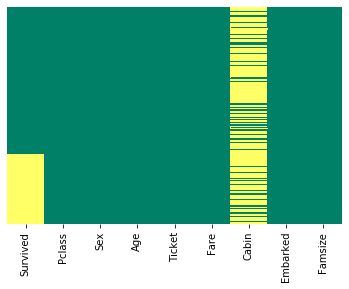

In [46]:
# age featured imputed; no missing age records
sb.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'summer')

In [40]:
# count missing values
print(data["Embarked"].isnull().sum()) # 2

# Fill Embarked nan values of dataset set with 'S' most frequent value
data["Embarked"].fillna(data['Embarked'].mode()[0], inplace = True)

2


In [43]:
data.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [44]:
data['Fare'].fillna(data['Fare'].mean(),inplace = True)

In [45]:
data

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Famsize
0,0.0,3,male,22.0,A/5 21171,7.2500,NaN,S,1
1,1.0,1,female,38.0,PC 17599,71.2833,C85,C,1
2,1.0,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1.0,1,female,35.0,113803,53.1000,C123,S,1
4,0.0,3,male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,24.0,A.5. 3236,8.0500,NaN,S,0
1305,NaN,1,female,39.0,PC 17758,108.9000,C105,C,0
1306,NaN,3,male,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,NaN,3,male,24.0,359309,8.0500,NaN,S,0


In [47]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
data['Sex'] = enc.fit_transform(data['Sex'])
data['Embarked'] = enc.fit_transform(data['Embarked'])

In [48]:
data

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Famsize
0,0.0,3,1,22.0,A/5 21171,7.2500,NaN,2,1
1,1.0,1,0,38.0,PC 17599,71.2833,C85,0,1
2,1.0,3,0,26.0,STON/O2. 3101282,7.9250,NaN,2,0
3,1.0,1,0,35.0,113803,53.1000,C123,2,1
4,0.0,3,1,35.0,373450,8.0500,NaN,2,0
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,24.0,A.5. 3236,8.0500,NaN,2,0
1305,NaN,1,0,39.0,PC 17758,108.9000,C105,0,0
1306,NaN,3,1,38.5,SOTON/O.Q. 3101262,7.2500,NaN,2,0
1307,NaN,3,1,24.0,359309,8.0500,NaN,2,0


In [49]:
data.drop(['Ticket','Cabin'],axis=1, inplace = True)
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Famsize
0,0.0,3,1,22.0,7.2500,2,1
1,1.0,1,0,38.0,71.2833,0,1
2,1.0,3,0,26.0,7.9250,2,0
3,1.0,1,0,35.0,53.1000,2,1
4,0.0,3,1,35.0,8.0500,2,0
...,...,...,...,...,...,...,...
1304,NaN,3,1,24.0,8.0500,2,0
1305,NaN,1,0,39.0,108.9000,0,0
1306,NaN,3,1,38.5,7.2500,2,0
1307,NaN,3,1,24.0,8.0500,2,0


In [50]:
data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Famsize       0
dtype: int64

In [52]:
train_new = data[:len(train)]
test_new = data[len(train):]
train_new.shape

(891, 7)

In [53]:
test_new.shape

(418, 7)

In [54]:
test_new.drop('Survived',axis=1,inplace=True)

In [55]:
test_new

,Pclass,Sex,Age,Fare,Embarked,Famsize
891,3,1,34.5,7.8292,1,0
892,3,0,47.0,7.0000,2,1
893,2,1,62.0,9.6875,1,0
894,3,1,27.0,8.6625,2,0
895,3,0,22.0,12.2875,2,2
...,...,...,...,...,...,...
1304,3,1,24.0,8.0500,2,0
1305,1,0,39.0,108.9000,0,0
1306,3,1,38.5,7.2500,2,0
1307,3,1,24.0,8.0500,2,0


In [56]:
train_new

,Survived,Pclass,Sex,Age,Fare,Embarked,Famsize
0,0.0,3,1,22.0,7.2500,2,1
1,1.0,1,0,38.0,71.2833,0,1
2,1.0,3,0,26.0,7.9250,2,0
3,1.0,1,0,35.0,53.1000,2,1
4,0.0,3,1,35.0,8.0500,2,0
...,...,...,...,...,...,...,...
886,0.0,2,1,27.0,13.0000,2,0
887,1.0,1,0,19.0,30.0000,2,0
888,0.0,3,0,24.0,23.4500,2,3
889,1.0,1,1,26.0,30.0000,0,0


In [57]:
# Split data into X and y
X = train_new.iloc[:,1:]
y = train_new['Survived']
X

,Pclass,Sex,Age,Fare,Embarked,Famsize
0,3,1,22.0,7.2500,2,1
1,1,0,38.0,71.2833,0,1
2,3,0,26.0,7.9250,2,0
3,1,0,35.0,53.1000,2,1
4,3,1,35.0,8.0500,2,0
...,...,...,...,...,...,...
886,2,1,27.0,13.0000,2,0
887,1,0,19.0,30.0000,2,0
888,3,0,24.0,23.4500,2,3
889,1,1,26.0,30.0000,0,0


In [58]:
X.shape

(891, 6)

In [59]:
y.shape

(891,)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [61]:
kf = KFold(n_splits=5,random_state=20,shuffle=False)
kf.split(X)

<generator object _BaseKFold.split at 0x00000236AB07B1C8>

In [62]:
LR = LogisticRegression()
# feeding the training data to the model
LR_accuracy_model = []
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    modelLR = LR.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    LR_accuracy_model.append(accuracy_score(y_test, modelLR.predict(X_test))*100)

# Print the accuracy    
print(LR_accuracy_model)

[78.77094972067039, 81.46067415730337, 79.21348314606742, 76.40449438202246, 83.14606741573034]


In [63]:
from sklearn import svm
svc = svm.SVC(kernel='linear') # Linear Kernel

# feeding the training data to the model
SVC_accuracy_model = []
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    modelSVC = svc.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    SVC_accuracy_model.append(accuracy_score(y_test, modelSVC.predict(X_test))*100)

# Print the accuracy    
print(SVC_accuracy_model)

[81.56424581005587, 79.7752808988764, 78.08988764044943, 73.59550561797754, 80.33707865168539]


In [64]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
DT = DecisionTreeClassifier()

# feeding the training data to the model
DT_accuracy_model = []
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    modelDT = DT.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    DT_accuracy_model.append(accuracy_score(y_test, modelDT.predict(X_test))*100)

# Print the accuracy    
print(DT_accuracy_model)

[77.09497206703911, 76.96629213483146, 83.14606741573034, 76.96629213483146, 77.52808988764045]


In [65]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100)

# feeding the training data to the model
RF_accuracy_model = []
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    modelRF = RF.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    RF_accuracy_model.append(accuracy_score(y_test, modelRF.predict(X_test))*100)

# Print the accuracy    
print(RF_accuracy_model)

[78.77094972067039, 81.46067415730337, 83.70786516853933, 77.52808988764045, 82.58426966292134]


In [66]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)

# feeding the training data to the model
KNN_accuracy_model = []
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    modelKNN = KNN.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    KNN_accuracy_model.append(accuracy_score(y_test, modelKNN.predict(X_test))*100)

# Print the accuracy    
print(KNN_accuracy_model)

[67.59776536312849, 69.10112359550563, 71.34831460674157, 71.91011235955057, 73.03370786516854]


In [67]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
NB = GaussianNB()

# feeding the training data to the model
NB_accuracy_model = []
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    modelNB = NB.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    NB_accuracy_model.append(accuracy_score(y_test, modelNB.predict(X_test))*100)

# Print the accuracy    
print(NB_accuracy_model)


[73.74301675977654, 79.21348314606742, 78.08988764044943, 79.7752808988764, 83.14606741573034]


In [68]:
from sklearn.linear_model import SGDClassifier
SGDReg =SGDClassifier(max_iter = 1000,penalty = "elasticnet",loss = 'huber',tol = 1e-3, average = True)

# feeding the training data to the model
SGD_accuracy_model = []
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    modelSGD = SGDReg.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    SGD_accuracy_model.append(accuracy_score(y_test, modelSGD.predict(X_test))*100)

# Print the accuracy    
print(SGD_accuracy_model)

[58.10055865921788, 57.30337078651685, 33.146067415730336, 40.44943820224719, 35.39325842696629]


In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [71]:
CV_rfc = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [72]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [73]:
CV_rfc.best_score_

0.8442824780852949

In [75]:
RF=RandomForestClassifier(criterion = 'entropy',
 max_depth= 8,
 max_features= 'auto',
 n_estimators= 200)

# feeding the training data to the model
RF_accuracy_model = []
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    modelRF = RF.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    RF_accuracy_model.append(accuracy_score(y_test, modelRF.predict(X_test))*100)

# Print the accuracy    
print(RF_accuracy_model)

[81.00558659217877, 82.02247191011236, 85.95505617977528, 78.65168539325843, 84.26966292134831]


In [76]:
test_new

,Pclass,Sex,Age,Fare,Embarked,Famsize
891,3,1,34.5,7.8292,1,0
892,3,0,47.0,7.0000,2,1
893,2,1,62.0,9.6875,1,0
894,3,1,27.0,8.6625,2,0
895,3,0,22.0,12.2875,2,2
...,...,...,...,...,...,...
1304,3,1,24.0,8.0500,2,0
1305,1,0,39.0,108.9000,0,0
1306,3,1,38.5,7.2500,2,0
1307,3,1,24.0,8.0500,2,0


In [77]:
#Predicting on test data for submission
submission = modelRF.predict(test_new)
submission

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [80]:
#Creating file for submission
submission_file = pd.DataFrame()
submission_file['PassengerId'] = test['PassengerId']
submission_file['Survived'] = submission.astype('i')
submission_file.to_csv('submission.csv', index=False)

In [81]:
sub = pd.read_csv('submission.csv')
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
